In [1]:
import pandas as pd
import os

In [2]:
all_bigrams_path = '/media/krowd/Data/CrossBorderSampled/all_bigrams_sampled'

In [3]:
len(os.listdir(all_bigrams_path))

27

In [4]:
df = pd.DataFrame(columns=['id','token_list'])
df.head()

,id,token_list


In [5]:
for file in os.listdir(all_bigrams_path):
    id = file.replace("entity_","")
    id = id.replace('.txt','')
    with open(os.path.join(all_bigrams_path,file),'r') as f:
        #tokens_dict[id]= f.read().split()
        df = df.append({'id':id,'token_list':f.read().split()},ignore_index=True)
    

In [6]:
print(df.shape)
df.head()

(27, 2)


,id,token_list
0,service_1549654281612y5o71a9qjpa,"[place, just, food_available, luckily, padding..."
1,service_0599883f41aa4839969147cf8f06d87a,"[awesome, ok, hardly, oily, big, north_indian,..."
2,service_08876b7cbfc24623a18c41ee00c48cfc,"[newly, khawaneej, wala, food, surrounding, al..."
3,service_1549650011117igv4b8hkuhp,"[promptly_then, fact_good, bread_fresh, person..."
4,service_1549650327042ssjmpgyvood,"[2, flexibility, kevin, business_meeting, dinn..."


In [7]:
df['no_of_tokens'] = df.token_list.apply(lambda x: len(x))
df['unique_no_of_tokens'] = df.token_list.apply(lambda x : len(list(set(x))))

In [10]:
print(df.shape)
df.head(24)

(27, 4)


,id,token_list,no_of_tokens,unique_no_of_tokens
0,service_1549654281612y5o71a9qjpa,"[place, just, food_available, luckily, padding...",7000,123
1,service_0599883f41aa4839969147cf8f06d87a,"[awesome, ok, hardly, oily, big, north_indian,...",7000,311
2,service_08876b7cbfc24623a18c41ee00c48cfc,"[newly, khawaneej, wala, food, surrounding, al...",7000,100
3,service_1549650011117igv4b8hkuhp,"[promptly_then, fact_good, bread_fresh, person...",7000,3460
4,service_1549650327042ssjmpgyvood,"[2, flexibility, kevin, business_meeting, dinn...",6998,3987
5,service_1549651741764q95j6es4hu,"[future, full_meal, too, member_staff, part_xm...",7000,1006
6,service_15496520333351tni4q3a6b9,"[not_now, perfect_other, service_wine, dish_de...",7000,239
7,service_1549652388298wfrv5zdjtw,"[thing, portion, 15, totally_acceptable, mediu...",7000,3749
8,service_15496524279452efmatad97b,"[down, perfectly, always_very, wrap_delicious,...",7000,2250
9,service_15496525315504ymk5q6sk1k,"[butter_chicken, suffocation, indian_restauran...",6998,2633


In [9]:
df[df.id=='service_154964980297320is2150ga7']

,id,token_list,no_of_tokens,unique_no_of_tokens


In [19]:
import mysql.connector

from google.cloud import secretmanager

PROJECT_ID = 'alpha-274108'

def access_secret_version(self,project_id, secret_id, version_id):
    """
    Access the payload for the given secret version if one exists. The version
    can be a version number as a string (e.g. "5") or an alias (e.g. "latest").
    """
    # Create the Secret Manager client.
    client = secretmanager.SecretManagerServiceClient()

    # Build the resource name of the secret version.
    name = client.secret_version_path(project_id, secret_id, version_id)

    # Access the secret version.
    response = client.access_secret_version(name)
    
    payload = response.payload.data.decode('UTF-8')
    return format(payload)


HOSTNAME = access_secret_version(PROJECT_ID, 'CHOST-A', 'latest'),
USER = access_secret_version(PROJECT_ID, 'CHOST-A-USER', 'latest'),
PASSWORD = access_secret_version(PROJECT_ID, 'CHOST-A-PASS', 'latest'),
DATABASE = 'sydney_zomato_database'

def get_connection():
    mydb = mysql.connector.connect(
        host=HOSTNAME,
        user=USER,
        passwd=PASSWORD,
        database=DATABASE
    )

    mycursor = mydb.cursor()

    return mydb, mycursor

mycursor,mydb = get_connection()

In [20]:

mycursor.execute('SELECT e.id,se.name,se.address FROM entity e,service_entity se,entity_summary es WHERE e.entity_id = se.id AND e.id = es.entity_id')

zomato_rest_df = pd.DataFrame(mycursor.fetchall())

In [21]:
zomato_rest_df.columns = ['id','name','address']
print(zomato_rest_df.shape)
zomato_rest_df.head()

(8848, 3)


,id,name,address
0,service_b0a328e786274da4b3863b57020ae5d8,Maestro - Conrad Dubai,"Floor 7, Conrad Dubai, Sheikh Zayed Road, Trad..."
1,service_3f206fe1259548b992f571207562d104,Cozy Cabana,"Ground Floor, Sonoker Point Building, Umm Hura..."
2,service_56b8ed95a12a40f39050ee9043ce5ea3,Zaferan Iranian Restaurant,"Ibn Batuta Mall, Garden Cross Road, Jebel Ali ..."
3,service_65ab79bc86b94b5d924db3b07f447940,Seattle's Best Coffee,"G41, Ground Floor, Building 7, Phase 2, Dubai ..."
4,service_9f053766fb6d41c3bdc4280ee2783baa,Pizza Hut,"ENOC Petrol Station, Opposite Al Wasl Club, Du..."


In [17]:

mycursor.execute('SELECT e.id,se.name,se.address FROM entity e,service_entity se,entity_summary es WHERE e.entity_id = se.id AND e.id = es.entity_id')

trip_rest_df = pd.DataFrame(mycursor.fetchall())

In [18]:
trip_rest_df.columns = ['id','name','address']
print(trip_rest_df.shape)
trip_rest_df.head()

(17622, 3)


,id,name,address
0,service_1549649802973cl31it84cgu,Humble Grape - Islington,"11-13 Theberton Street | off Upper Street, Lon..."
1,service_1549649802973pcqdsu7r53o,The Virgin Queen,"94 Goldsmiths Row, London E2 8QY, England"
2,service_15496498029735jvewtnkaud,Oliveira Organic Vegetarian Kitchen,"469 Upper Richmond Road West, London SW14 7PU,..."
3,service_1549649802973fhh9j7hj2n,Taste Of Nawab,"97 Colney Hatch Lane | Muswell Hill, London N1..."
4,service_15496498029733if9404ywys,The Clink Restaurant,"Brixton Jebb Avenue | Brixton, London SW2 5XF,..."


In [22]:
rest_df = zomato_rest_df.append(trip_rest_df,ignore_index=True)

In [23]:
rest_df.shape

(26470, 3)

In [24]:
df = df.merge(rest_df,how='inner',on='id')

In [25]:
print(df.shape)
df.colums = ['id','name','address','token_list','no_of_tokens','unique_no_of_tokens']
df.head()

(27, 6)


/home/krowd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,id,token_list,no_of_tokens,unique_no_of_tokens,name,address
0,service_1549654281612y5o71a9qjpa,"[place, just, food_available, luckily, padding...",7000,123,Wasabi Bento & Sushi,"Bridge Street | Unit 12, Paddington Station, L..."
1,service_0599883f41aa4839969147cf8f06d87a,"[awesome, ok, hardly, oily, big, north_indian,...",7000,311,Punjab Sarhad,"Ground Level, Y 21 Building, England Cluster, ..."
2,service_08876b7cbfc24623a18c41ee00c48cfc,"[newly, khawaneej, wala, food, surrounding, al...",7000,100,Rola Wala,"Last Exit Al Khawaneej, Al Khawaneej, Dubai"
3,service_1549650011117igv4b8hkuhp,"[promptly_then, fact_good, bread_fresh, person...",7000,3460,Lobos,"14 Borough High Street, London SE1 9QG, England"
4,service_1549650327042ssjmpgyvood,"[2, flexibility, kevin, business_meeting, dinn...",6998,3987,German Gymnasium,"1 King's Boulevard | Boulevard, London N1C 4BU..."


In [26]:
df.to_csv("/media/krowd/Data/CrossBorderSampled/token_counts_for_all_zt_rest.csv",header=True,index=False)

In [ ]:
#while using this script for the second time we can directly read the dataset saved in prev. cell
#df = pd.read_csv("/media/krowd/New Volume/Merchant-Directory/dataset-for-md/token_counts_for_all_zt_rest.csv",header=0)
#rint("Shape:",df.shape)
#f.head()

In [33]:
df.describe()

,no_of_tokens,unique_no_of_tokens
count,26470.000000,26470.000000
mean,2863.145825,1454.997280
std,9439.846060,2785.362628
min,0.000000,0.000000
25%,118.000000,108.000000
50%,569.000000,467.000000
75%,2344.750000,1620.750000
max,425592.000000,70821.000000


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

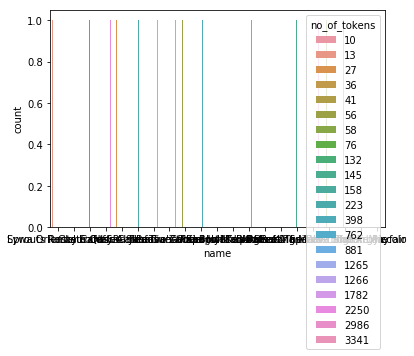

In [22]:
sns.countplot(x='name',hue='no_of_tokens',data=df.loc[:20,:]) 

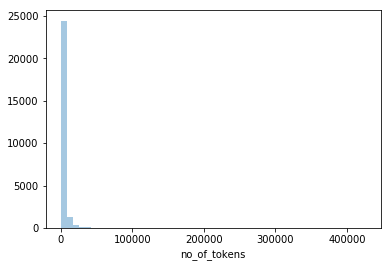

In [34]:
sns.distplot(df['no_of_tokens'],kde=False, rug=False)

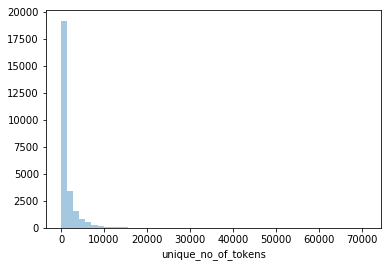

In [35]:
sns.distplot(df['unique_no_of_tokens'],kde=False, rug=False)

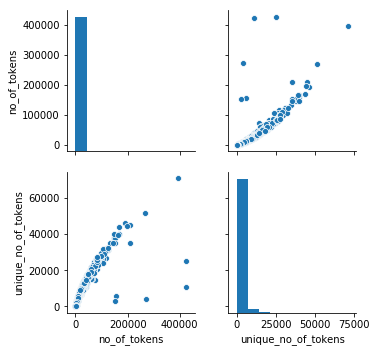

In [28]:
sns.pairplot(df)

In [96]:
#generate a histogram for a tokens appearing in a restaurant reviews.

import seaborn as sns
import matplotlib.pyplot as plt

def generateHistogram(term_frq_count):
    term_frq_df = pd.DataFrame.from_dict(term_frq_count,orient='index')
    term_frq_df.reset_index(drop=False,inplace=True)
    term_frq_df.columns = ['token','token_count']
    print("Shape:",term_frq_df.shape)
    term_frq_df.sort_values('token_count',ascending=False,inplace=True)
    term_frq_df.reset_index(drop=True,inplace=True)
    print(term_frq_df.head())
    
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 20))
   
    sns.set_color_codes("pastel")
    sns_plot = sns.barplot(x="token_count", y="token", data=term_frq_df.head(100),
                label="Total", color="b")
    fig = sns_plot.get_figure()
    fig.savefig("/home/krowd/Desktop/output.png",pad_inches = 2)

Shape: (123, 2)
   token  token_count
0  train          195
1  sushi          178
2     so          145
3    bag          128
4  spicy          109


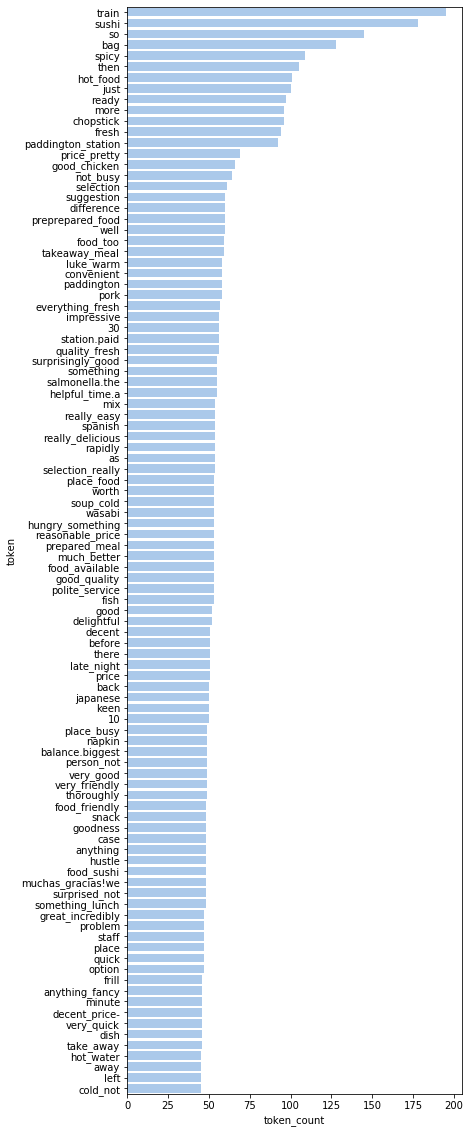

In [97]:
from collections import Counter

input_token_list = df[df.id=='service_1549654281612y5o71a9qjpa'].token_list.tolist()[0]
list_of_tokens = input_token_list

term_frq_count = dict(Counter(list_of_tokens))
generateHistogram(term_frq_count)

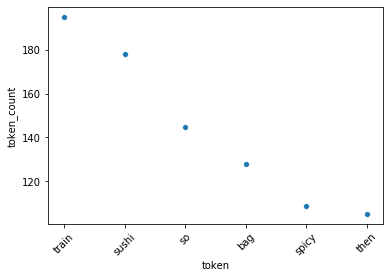

In [48]:
sns.scatterplot(term_frq_df.loc[:5,:].token,term_frq_df.loc[:5,:].token_count)
plt.xticks(rotation=45)
plt.show()

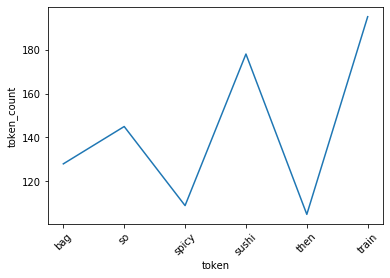

In [49]:
sns.lineplot(term_frq_df.loc[:5,:].token,term_frq_df.loc[:5,:].token_count)
plt.xticks(rotation=45)
plt.show()